In [1]:
from google.colab import files
files.upload()

Saving 삼성0916.csv to 삼성0916.csv


{'삼성0916.csv': b'\xef\xbb\xbf\xec\x9d\xbc\xec\x9e\x90,\xec\x8b\x9c\xea\xb0\x80,\xea\xb3\xa0\xea\xb0\x80,\xec\xa0\x80\xea\xb0\x80,\xec\xa2\x85\xea\xb0\x80,\xea\xb1\xb0\xeb\x9e\x98\xeb\x9f\x89,\xea\xb8\x88\xec\x95\xa1(\xeb\xb0\xb1\xeb\xa7\x8c),\xec\x8b\xa0\xec\x9a\xa9\xeb\xb9\x84,\xea\xb0\x9c\xec\x9d\xb8,\xea\xb8\xb0\xea\xb4\x80,\xec\x99\xb8\xec\x9d\xb8(\xec\x88\x98\xeb\x9f\x89),\xec\x99\xb8\xea\xb5\xad\xea\xb3\x84,\xed\x94\x84\xeb\xa1\x9c\xea\xb7\xb8\xeb\x9e\xa8,\xec\x99\xb8\xec\x9d\xb8\xeb\xb9\x84\r\n2020-09-15,"60,900","61,000","60,500","61,000","17,877,075","1,086,698",0,"-2,370,678","-1,867,006","-368,875","1,761,884","-176,837",56.01\r\n2020-09-14,"60,200","60,800","59,900","60,400","20,648,281","1,245,768",0.1,"-2,646,580","1,491,903","1,498,673","1,687,999","-1,155,085",56.01\r\n2020-09-11,"59,300","59,400","58,200","59,000","16,017,098","942,686",0.1,"1,524,288","-1,081,621","-535,505","-510,631","-1,235,137",55.99\r\n2020-09-10,"59,900","60,000","59,100","59,200","29,923,293","

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('삼성0916.csv')

In [4]:
data.iloc[-1:]

,일자,시가,고가,저가,종가,거래량,금액(백만),신용비,개인,기관,외인(수량),외국계,프로그램,외인비
582,2018-05-04,"53,000","53,900","51,800","51,900","39,565,391","2,078,018",0.13,"12,462,154","-11,260,560","-1,223,630","-1,144,917","42,607",52.79


In [5]:
data.iloc[:,[1,2,3,4,5]].isnull().sum()

시가     0
고가     0
저가     0
종가     0
거래량    0
dtype: int64

In [6]:
label = data.iloc[:,[4]]

In [7]:
x_data = data.iloc[:,[1,2,3,4,5]]

In [8]:
label.shape

(583, 1)

In [9]:
x_data.shape

(583, 5)

In [10]:
x_data = np.array(x_data[::-1])
label = np.array(label[::-1])

In [11]:
label = label.reshape(-1)
print(label.shape)

(583,)


In [12]:
for i in x_data:
  for j in range(5):
    i[j]=int(i[j].replace(',',''))

print(x_data[0:5],'\n',x_data[-5:])
for i in range(len(label)):
  label[i]=int(label[i].replace(',',''))

print('\n',label[0:5], label[-5:])

[[53000 53900 51800 51900 39565391]
 [52600 53200 51900 52600 23104720]
 [52600 52800 50900 50900 16128305]
 [51700 51700 50600 51600 13905263]
 [52000 52200 51200 51300 10314997]] 
 [[58200 59300 57800 58400 30597399]
 [59900 60000 59100 59200 29923293]
 [59300 59400 58200 59000 16017098]
 [60200 60800 59900 60400 20648281]
 [60900 61000 60500 61000 17877075]]

 [51900 52600 50900 51600 51300] [58400 59200 59000 60400 61000]


In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
sc = MinMaxScaler()
x_data = sc.fit_transform(x_data)

In [15]:
label = label/10000

In [16]:
x_data[0:5]

array([[0.63340122, 0.6468254 , 0.60160966, 0.57915832, 0.59505985],
       [0.61710794, 0.61904762, 0.6056338 , 0.60721443, 0.3164648 ],
       [0.61710794, 0.6031746 , 0.56539235, 0.53907816, 0.19838974],
       [0.58044807, 0.55952381, 0.55331992, 0.56713427, 0.160765  ],
       [0.59266802, 0.57936508, 0.57746479, 0.55511022, 0.10000014]])

In [17]:
x_train_dataset = x_data[:]
x_test_dataset = x_data[-100:]
y_train_dataset = label[:]
y_test_dataset = label[-100:]

print(x_train_dataset.shape, x_test_dataset.shape, y_train_dataset.shape, y_test_dataset.shape)

(583, 5) (100, 5) (583,) (100,)


In [18]:
print(y_test_dataset)

[4.985 4.935 4.985 5.01 5.0 4.85 4.92 4.88 4.88 4.84 4.79 4.855 4.8 4.785
 4.88 5.03 5.0 4.995 4.875 4.885 4.925 4.99 5.04 5.07 5.12 5.14 5.45 5.46
 5.55 5.49 5.55 5.54 5.43 5.23 4.99 5.21 5.22 5.23 5.29 5.2 5.14 5.29 5.19
 5.33 5.24 5.28 5.26 5.29 5.36 5.5 5.34 5.3 5.28 5.27 5.34 5.38 5.47 5.38
 5.44 5.42 5.53 5.47 5.41 5.42 5.56 5.86 5.9 5.9 5.79 5.68 5.73 5.69 5.8
 5.75 5.78 5.82 5.9 5.87 5.8 5.84 5.78 5.54 5.59 5.61 5.64 5.64 5.56 5.54
 5.4 5.42 5.44 5.64 5.56 5.65 5.87 5.84 5.92 5.9 6.04 6.1]


In [19]:
def slice_dataset(x,y,predict_date=4,period=20):
  x_return = []
  y_return = []
  x_last = []
  for i in range(len(x)-predict_date-period+1):
    x_return.append(x[i:i+period])
    y_return.append(y[i+period:i+period+predict_date])
  for i in range(len(x)-period+1):
    x_last.append(x[i:i+period])

  return np.array(x_return, dtype='f8'), np.array(y_return, dtype='f8'), np.array(x_last, dtype='f8')

In [20]:
def sd(x,y,period):
  x_return = []
  y_return = []
  x_last = []
  for i in range(len(x)-period):
    x_return.append(x[i:i+period])
    y_return.append(y[i+period])
  for i in range(len(x)-period+1):
    x_last.append(x[i:i+period])

  return np.array(x_return), np.array(y_return), np.array(x_last)

In [21]:

x_train, y_train,_ = slice_dataset(x_train_dataset, y_train_dataset,1,20)

x_test, y_test, x_last = slice_dataset(x_test_dataset, y_test_dataset,1,20)

# x_train, y_train,_ = sd(x_train_dataset, y_train_dataset,30)

# x_test, y_test, x_last = sd(x_test_dataset, y_test_dataset, 30)



print(x_train.shape,y_train.shape, x_test.shape, y_test.shape, x_last.shape)

(563, 20, 5) (563, 1) (80, 20, 5) (80, 1) (81, 20, 5)


In [22]:
print(x_test)

[[[0.51934827 0.50396825 0.50905433 0.49699399 0.24283682]
  [0.49694501 0.48214286 0.4889336  0.47695391 0.18975876]
  [0.48472505 0.49206349 0.49295775 0.49699399 0.1632057 ]
  ...
  [0.52342159 0.50793651 0.52313883 0.501002   0.17843463]
  [0.49490835 0.48412698 0.47283702 0.45290581 0.25894664]
  [0.46028513 0.4484127  0.4668008  0.45691383 0.16808755]]

 [[0.49694501 0.48214286 0.4889336  0.47695391 0.18975876]
  [0.48472505 0.49206349 0.49295775 0.49699399 0.1632057 ]
  [0.50509165 0.49603175 0.50100604 0.50701403 0.19783281]
  ...
  [0.49490835 0.48412698 0.47283702 0.45290581 0.25894664]
  [0.46028513 0.4484127  0.4668008  0.45691383 0.16808755]
  [0.45824847 0.4702381  0.47283702 0.47294589 0.18145105]]

 [[0.48472505 0.49206349 0.49295775 0.49699399 0.1632057 ]
  [0.50509165 0.49603175 0.50100604 0.50701403 0.19783281]
  [0.50712831 0.51190476 0.51307847 0.50300601 0.18952496]
  ...
  [0.46028513 0.4484127  0.4668008  0.45691383 0.16808755]
  [0.45824847 0.4702381  0.4728370

In [23]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [26]:
model = Sequential()
model.add(LSTM(256,input_shape=(20,5),activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               268288    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

In [27]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
mc = ModelCheckpoint('./best_model.h5', monitor='val_loss', mode='min',verbose=1, save_best_only=True)


model.compile(loss='mse',optimizer='adam')

model.fit(x_train, y_train, batch_size=10, epochs=500, validation_data=(x_test, y_test) , callbacks=[es, mc])


model.load_weights('best_model.h5')

Epoch 1/500
56/57 [============================>.] - ETA: 0s - loss: 10.4386
Epoch 00001: val_loss improved from inf to 0.26376, saving model to ./best_model.h5
57/57 [==============================] - 2s 32ms/step - loss: 10.3901 - val_loss: 0.2638
Epoch 2/500
55/57 [===========================>..] - ETA: 0s - loss: 0.7979
Epoch 00002: val_loss did not improve from 0.26376
57/57 [==============================] - 2s 28ms/step - loss: 0.7897 - val_loss: 0.5162
Epoch 3/500
56/57 [============================>.] - ETA: 0s - loss: 0.3916
Epoch 00003: val_loss improved from 0.26376 to 0.04616, saving model to ./best_model.h5
57/57 [==============================] - 2s 28ms/step - loss: 0.3927 - val_loss: 0.0462
Epoch 4/500
56/57 [============================>.] - ETA: 0s - loss: 0.3505
Epoch 00004: val_loss did not improve from 0.04616
57/57 [==============================] - 2s 28ms/step - loss: 0.3497 - val_loss: 0.0765
Epoch 5/500
57/57 [==============================] - ETA: 0s - loss:

In [28]:
pre = model.predict(x_test)
print('                  0     +1    +2     +3                        0        +1         +2        +3')
print('--------------------------------------------------------------------------------------------------------------------------')
for i in range(len(pre)):
  print(f'{i}일 | 실제값 : {y_test[i]}만원  |  예측값 : {pre[i]}만원 |    차이 : {pre[i]-y_test[i]}만원')

                  0     +1    +2     +3                        0        +1         +2        +3
--------------------------------------------------------------------------------------------------------------------------
0일 | 실제값 : [4.925]만원  |  예측값 : [4.918741]만원 |    차이 : [-0.00625877]만원
1일 | 실제값 : [4.99]만원  |  예측값 : [4.9816523]만원 |    차이 : [-0.00834774]만원
2일 | 실제값 : [5.04]만원  |  예측값 : [5.0435305]만원 |    차이 : [0.00353046]만원
3일 | 실제값 : [5.07]만원  |  예측값 : [5.152238]만원 |    차이 : [0.08223789]만원
4일 | 실제값 : [5.12]만원  |  예측값 : [5.1458664]만원 |    차이 : [0.02586639]만원
5일 | 실제값 : [5.14]만원  |  예측값 : [5.1785145]만원 |    차이 : [0.03851448]만원
6일 | 실제값 : [5.45]만원  |  예측값 : [5.1951423]만원 |    차이 : [-0.25485773]만원
7일 | 실제값 : [5.46]만원  |  예측값 : [5.4713354]만원 |    차이 : [0.01133541]만원
8일 | 실제값 : [5.55]만원  |  예측값 : [5.5651426]만원 |    차이 : [0.01514263]만원
9일 | 실제값 : [5.49]만원  |  예측값 : [5.5047703]만원 |    차이 : [0.01477028]만원
10일 | 실제값 : [5.55]만원  |  예측값 : [5.518432]만원 |    차이 : [-0.03156786]만원
11일 | 실제값 : [5.54]만

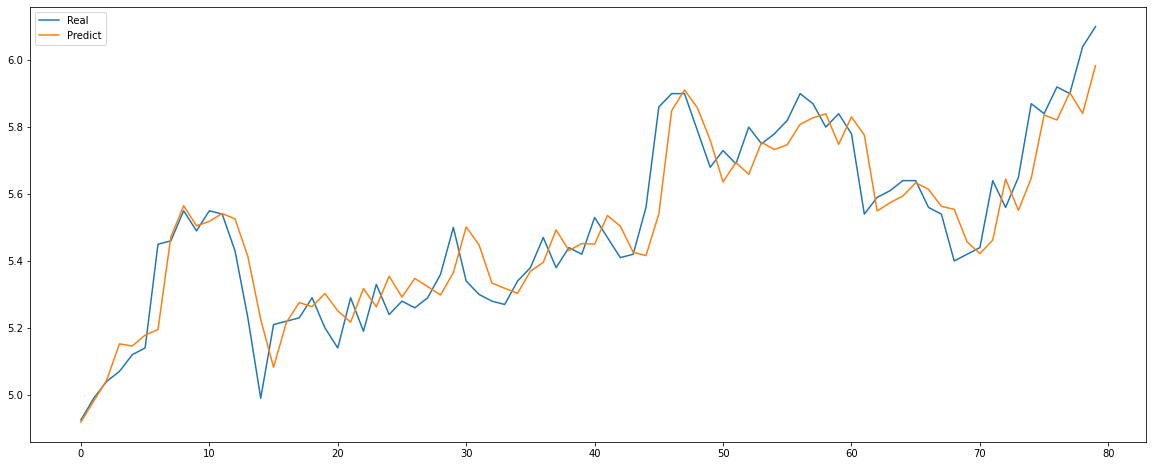

In [29]:
import matplotlib.pyplot as plt

fig = plt.figure(facecolor='white', figsize=(20, 8))
ax = fig.add_subplot(111)
ax.plot(y_test, label='Real')
ax.plot(pre, label='Predict')
ax.legend()
plt.show()

In [30]:
print(f'종가 예측 : {model.predict(x_last)[-1]} 만원')

종가 예측 : [6.017019] 만원
